In [53]:
import json
import sys
sys.path.append("../")

from models import DiffusivityData
from constants import *
from help_functions import *
from pathlib import Path
from optimize import Optimizer
from plots import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Prepare the data in DiffusionData object.

In [55]:
# Define a DiffusionData object.
# elements = ["Ag", "Cu"]
elements = ["Fe", "Ni"]
system = elements[0] + elements[1]
phase = "FCC_A1"
diffusion_data = DiffusivityData(elements)
# load data
datafile = f"./{system}_diffusion_coefficient_data.xlsx"
diffusion_data.load_data_from_excel(datafile)

# thermodynamic interaction parameter datafile
thermo_inter_param_file = f"./{system}_thermodynamic_interaction_parameters.json"
diffusion_data.load_interaction_parameters(thermo_inter_param_file)
#
# # calculate end member diffusion coefficient data.
# end_member_file = "./end_member_database.json"
end_member_file = "./all_end_members_database.json"
diffusion_data.end_member_calc(end_member_file)


FileNotFoundError: [Errno 2] No such file or directory: './FeNi_diffusion_coefficient_data.xlsx'

In [4]:
diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,NaN,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,NaN,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,NaN,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,NaN,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,NaN,1,0.974463,0.025537,820.0,1093.0


In [5]:
""" using Thermo-Calc owned databases. """
# tc_database="TCAL7"
# diffusion_data.thermodynamic_factor_calc(database_mode="calphad", database=tc_database)

""" read self defined database """
diffusion_data.thermodynamic_factor_calc()

diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,0.975150,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0


## compare tc-calculated and self-calculated thermodynamic factor

In [6]:
# tf_tc = diffusion_data.data.TF
# diffusion_data.thermodynamic_factor_calc()
# tf_self = diffusion_data.data.TF
# plt.scatter(tf_tc, tf_self, s=100)
# diffusion_data.data.head()

## Optimize the parameters using Optimizer object


In [7]:
optimizer = Optimizer(diffusion_data)


In [8]:
optimizer.diffusivity_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,0.975150,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,0.996148,1,0.998939,0.001061,701.0,974.0
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,0.963507,1,0.990000,0.010000,701.0,974.0
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,0.926641,1,0.980000,0.020000,701.0,974.0
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,0.851923,1,0.960000,0.040000,701.0,974.0


In [9]:
optimizer.init_params

array([0.71016098])

In [10]:
# predict diffusion coefficients
diff_calc = optimizer.diffusivity_data.diffusion_coefs_calc([62922.572308])
diff_calc

0      9.028361e-14
1      1.002918e-13
2      1.052506e-13
3      5.389417e-14
4      6.000107e-14
           ...     
124    6.773377e-15
125    6.832043e-15
126    6.878031e-15
127    6.903113e-15
128    6.831803e-15
Length: 129, dtype: float64

In [11]:
# optimizer.init_params = [0.1, 0.2]
# optimizer.model="2-para"
# optimizer.method = "least_squares"
optimizer.optimize()

# optimizer.method = "minimize"
# optimizer.optimize(method="Nelder-Mead")

In [12]:
optimizer.optimized_results

{'OptimizedResult':  active_mask: array([0.])
         cost: 4.911757515248955
          fun: array([-0.17830904, -0.36835804, -0.43470912, -0.13377119, -0.33791163,
        -0.38688711, -0.10759079, -0.30998387, -0.32490201, -0.10298751,
        -0.27937471, -0.38901313, -0.62475198, -0.50939247, -0.55455199,
        -0.42599008, -0.60019008, -0.50117892, -0.41116952, -0.31215837,
        -0.39414362, -0.2622055 ,  0.11175167,  0.02380441,  0.03207277,
        -0.08167029, -0.10516584,  0.13288904, -0.01215113, -0.05178487,
        -0.15030953, -0.10144374,  0.02064949, -0.08901308, -0.0710017 ,
        -0.16970264, -0.23380693,  0.12761759, -0.01960618, -0.02831687,
        -0.12171036, -0.14632585,  0.16004871,  0.06274853, -0.02853474,
        -0.16261288, -0.12693606,  0.01988636, -0.11058264, -0.1576355 ,
        -0.16846399, -0.21725354, -0.08984995, -0.18911352, -0.33124524,
        -0.39853559, -0.43878795,  0.01554893, -0.15010978, -0.21346052,
        -0.3992358 , -0.3987351

In [13]:
df = diffusion_data.data

In [14]:
# df.plot(x = "Dexp", y = "D_1-para", kind="scatter", logx=True, logy=True)

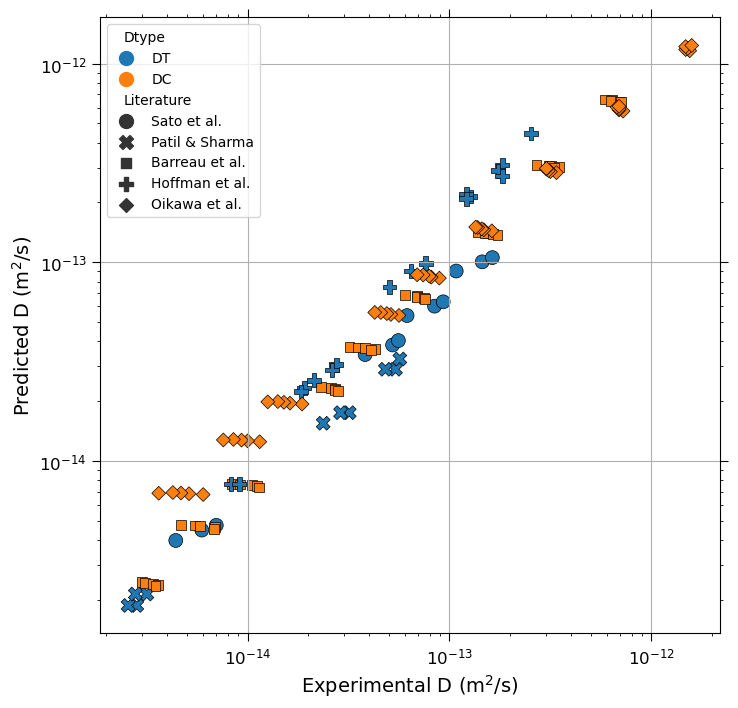

In [15]:
# matplotlib.rcParams['markers.fillstyle'] = "none"
# matplotlib.rcParams['lines.marker'] = None
matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['lines.markeredgecolor'] = "black"
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Experimental D (m$^2$/s)")
ax.set_ylabel("Predicted D (m$^2$/s)")
ax.set_xscale('log')
ax.set_yscale('log', basey=10)
ax.grid(True)
# ax.set_fc("b")
sns.scatterplot(
    data=df, x="Dexp", y="D_1-para", hue="Dtype", style="Literature",
    ax=ax, palette="tab10", edgecolor="black", linewidth=0.5
)

In [16]:
diffusion_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,D_1-para
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0,9.035691e-14
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0,1.005366e-13
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0,1.055865e-13
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,0.975150,1,0.991647,0.008353,820.0,1093.0,5.393913e-14
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0,6.015155e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,0.996148,1,0.998939,0.001061,701.0,974.0,6.774188e-15
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,0.963507,1,0.990000,0.010000,701.0,974.0,6.839688e-15
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,0.926641,1,0.980000,0.020000,701.0,974.0,6.893276e-15
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,0.851923,1,0.960000,0.040000,701.0,974.0,6.933121e-15


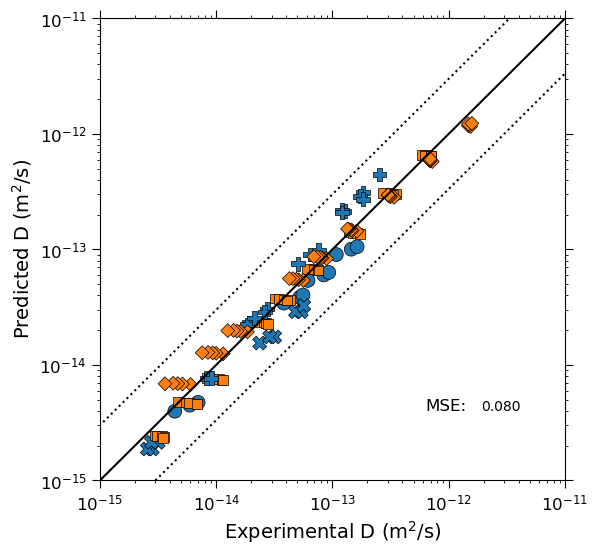

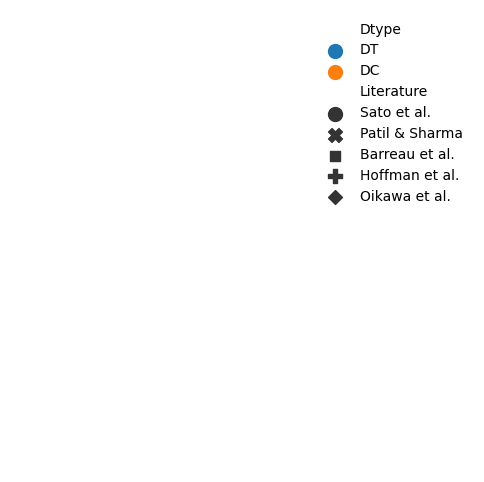

In [17]:
from plots import *
# matplotlib.rcdefaults()
# matplotlib.rcParams['xtick.top'] = True
# matplotlib.rcParams['ytick.right'] = True
# matplotlib.rcParams['xtick.major.size'] = 6
# matplotlib.rcParams['ytick.major.size'] = 6
# matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['xtick.minor.size'] = 2
# matplotlib.rcParams['ytick.minor.size'] = 2
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['axes.labelsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
exp_vs_pred_plot(diffusion_data.data, "1-para", ax, ax_legend, hue='Dtype', style='Literature', )

# matplotlib.rcdefaults()

In [18]:
diffusion_data.end_dc.keys()

dict_keys(['AA', 'AB', 'BA', 'BB'])

In [19]:
comps = np.arange(0, 1.01, 0.01)
temps = diffusion_data.data.temp_celsius.unique()
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(diffusion_data.thermodynamic_interaction_parameters,
                                  grid_data["comp_A_mf"], grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

In [20]:
grid_data

,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,TF,DTA,DTB,DIA,DIB,DC
0,0.00,1.00,850.000000,1123.000000,1.000000,5.784236e-14,1.302846e-14,5.784236e-14,1.302846e-14,5.784236e-14
1,0.01,0.99,850.000000,1123.000000,0.922929,6.213650e-14,1.425809e-14,5.734755e-14,1.315920e-14,5.690566e-14
2,0.02,0.98,850.000000,1123.000000,0.848399,6.665822e-14,1.558245e-14,5.655277e-14,1.322013e-14,5.568611e-14
3,0.03,0.97,850.000000,1123.000000,0.776381,7.141128e-14,1.700655e-14,5.544238e-14,1.320357e-14,5.417521e-14
4,0.04,0.96,850.000000,1123.000000,0.706845,7.639872e-14,1.853544e-14,5.400206e-14,1.310169e-14,5.236605e-14
...,...,...,...,...,...,...,...,...,...,...
3126,0.96,0.04,702.210158,975.210158,0.852226,6.496034e-15,8.438331e-15,5.536091e-15,7.191368e-15,7.125157e-15
3127,0.97,0.03,702.210158,975.210158,0.889663,6.077892e-15,8.058264e-15,5.407276e-15,7.169139e-15,7.116283e-15
3128,0.98,0.02,702.210158,975.210158,0.926793,5.677719e-15,7.683207e-15,5.262073e-15,7.120746e-15,7.083572e-15
3129,0.99,0.01,702.210158,975.210158,0.963584,5.295548e-15,7.314081e-15,5.102704e-15,7.047730e-15,7.028279e-15


In [21]:
literature_list = diffusion_data.data["Literature"].unique()[4:5]
x_type = "composition"
literature_list

array(['Oikawa et al.'], dtype=object)

(0.0, 0.1)

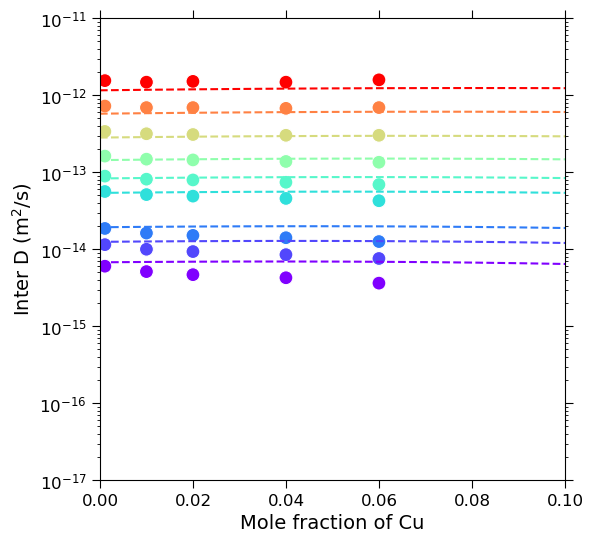

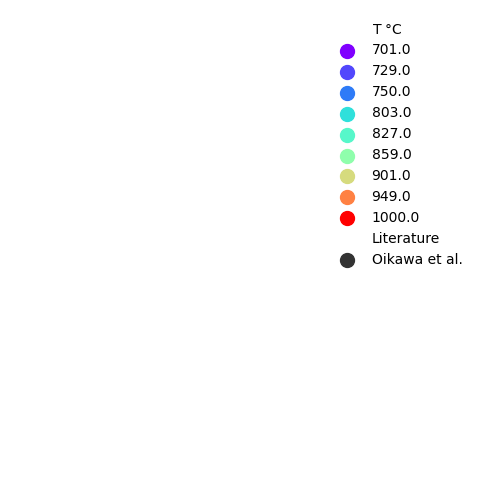

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="rainbow")
ax.set_xlim(0, 0.1)

In [23]:
# fig.savefig("plot_Oikawa et al.png", dpi=400)

In [24]:
comps = diffusion_data.data.comp_A_mf.unique()
temps = np.arange(diffusion_data.data.temp_celsius.min(), diffusion_data.data.temp_celsius.max() + 20, 20)
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(diffusion_data.thermodynamic_interaction_parameters,
                                  grid_data["comp_A_mf"], grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

In [25]:
grid_data

,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,TF,DTA,DTB,DIA,DIB,DC
0,0.991647,0.008353,653.0,926.0,0.966874,1.656938e-15,2.272997e-15,1.602051e-15,2.197702e-15,2.192727e-15
1,0.974463,0.025537,653.0,926.0,0.897954,1.876145e-15,2.481620e-15,1.684691e-15,2.228380e-15,2.214496e-15
2,0.966348,0.033652,653.0,926.0,0.865085,1.986133e-15,2.582291e-15,1.718174e-15,2.233902e-15,2.216547e-15
3,0.974702,0.025298,653.0,926.0,0.898918,1.872972e-15,2.478678e-15,1.683648e-15,2.228127e-15,2.214353e-15
4,0.955609,0.044391,653.0,926.0,0.821309,2.138088e-15,2.717270e-15,1.756031e-15,2.231718e-15,2.210602e-15
...,...,...,...,...,...,...,...,...,...,...
337,0.998939,0.001061,1013.0,1286.0,0.997737,9.384713e-13,1.379159e-12,9.363476e-13,1.376038e-12,1.375572e-12
338,0.990000,0.010000,1013.0,1286.0,0.978457,9.879032e-13,1.429893e-12,9.666210e-13,1.399089e-12,1.394765e-12
339,0.980000,0.020000,1013.0,1286.0,0.956469,1.045109e-12,1.487179e-12,9.996149e-13,1.422441e-12,1.413984e-12
340,0.960000,0.040000,1013.0,1286.0,0.911265,1.165469e-12,1.602975e-12,1.062051e-12,1.460735e-12,1.444787e-12


In [26]:
literature_list = diffusion_data.data["Literature"].unique()[4:5]
x_type = "temperature"
literature_list

array(['Oikawa et al.'], dtype=object)

(8.0, 12.0)

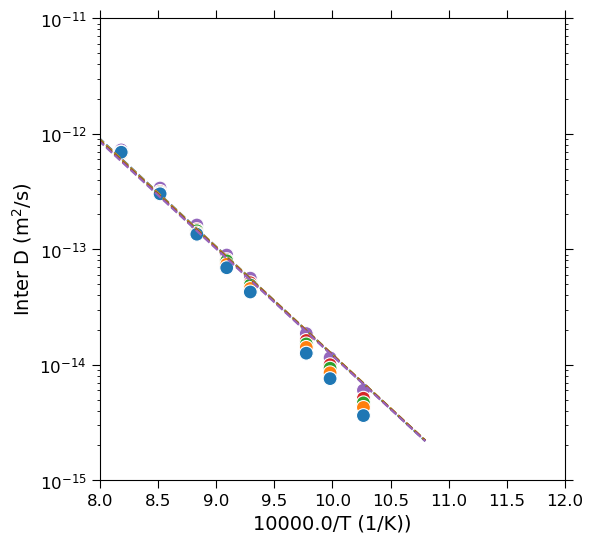

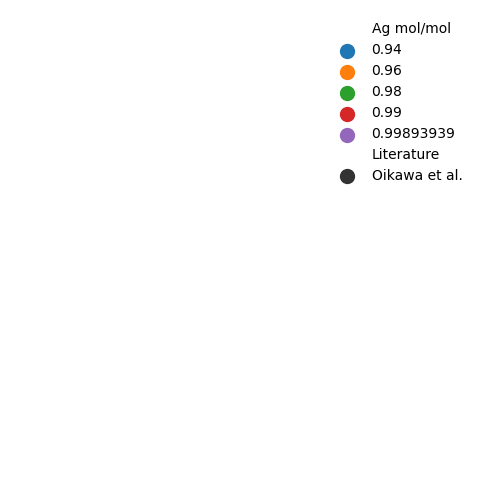

In [30]:

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="tab10")
ax.set_xlim(8, 12)

In [28]:
# data_file = "C:/Users/ustcw/Desktop/Research/Binary_assessment/FCC_ub_params.xlsx"
# save_file = "all_end_members_database.json"
# end_member_database_from_excel_to_json(data_file, save_file)




In [29]:
diffusion_data.data.iloc[0]["A_mp"]

99.164678